### 웹 크롤링 / 웹 스크래핑
- 웹 크롤링: 웹 전체를 이동하며 웹 페이지 발견/인덱싱
- 웹 스크래핑: 특정 웹 페이지로부터 데이터 추출

### robot.txt
- 웹의 최상위에 존재
- 접근 가능한 페이지 확인

### sitemap.xml
- 웹 사이트의 모든 페이지 목록
- 웹 사이트의 최상위 경로에 존재 or 다른 이름일 경우 robot.txt에

### rss
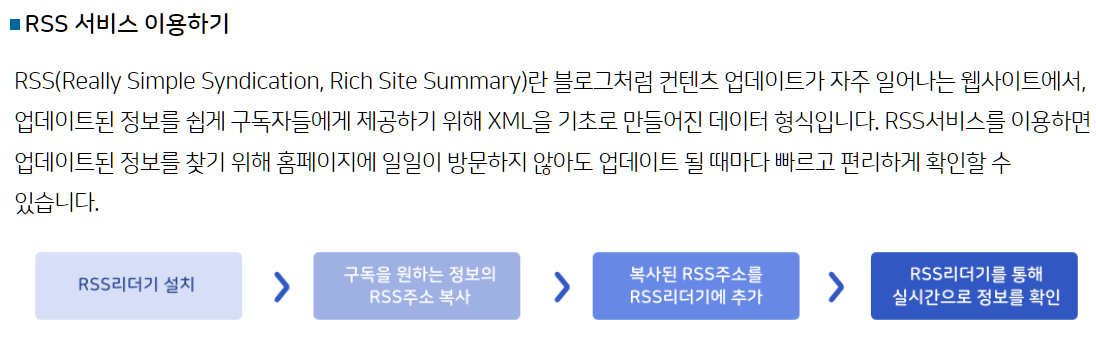

### 전문 프로그램: sns등의 콘텐츠의 데이터를 다운로드 하는 경우
[깃허브]
- facebook-chat-downloader(https://github.com/benkaiser/facebook-chat-downlo
ader)
- Instaloader(https://github.com/instaloader)

In [1]:
import urllib.robotparser
rp =  urllib.robotparser.RobotFileParser()

rp.set_url("https://WWW.reuters.com/robots.txt")  
# 로봇 txt 파일을 가리키는 url설정 -> 일반적으로 웹 주소의 최 상단에 robot.txt를 붙임

rp.read() 
# 파일을 읽어서 구문 분석기에 보냄

In [2]:
rp.can_fetch(useragent="*",url="https://reuters.com/sitemap.xml")
# user-agent가 해당 url에 접근 가능한지 확인

True

In [3]:
sitemaps=rp.site_maps()
sitemaps

['https://www.reuters.com/arc/outboundfeeds/sitemap-index/?outputType=xml',
 'https://www.reuters.com/arc/outboundfeeds/news-sitemap-index/?outputType=xml',
 'https://www.reuters.com/sitemap_video_index.xml',
 'https://www.reuters.com/brandfeature/sitemap']

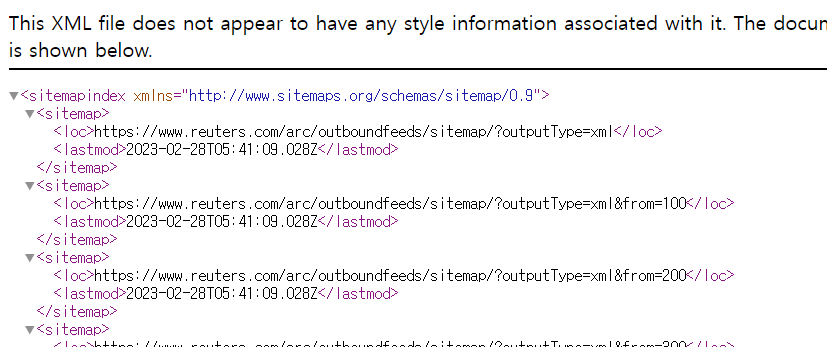

In [4]:
!pip install xmltodict

In [5]:
import xmltodict # XML파서를 위한 모튤
import requests

url = sitemaps[0]
sitemaps = xmltodict.parse(requests.get(url).text)

In [6]:
sitemaps

{'sitemapindex': {'@xmlns': 'http://www.sitemaps.org/schemas/sitemap/0.9',
  'sitemap': [{'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml',
    'lastmod': '2023-03-01T07:01:58.472Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=100',
    'lastmod': '2023-03-01T07:01:58.472Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=200',
    'lastmod': '2023-03-01T07:01:58.472Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=300',
    'lastmod': '2023-03-01T07:01:58.472Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=400',
    'lastmod': '2023-03-01T07:01:58.472Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=500',
    'lastmod': '2023-03-01T07:01:58.472Z'},
   {'loc': 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=600',
    'lastmod': '2023-03-01T07:01:58.

In [7]:
sitemaps['sitemapindex']['sitemap'][1]['loc']

'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=100'

In [8]:
# 사이트맵에서 url만 추출(iterable 이용)
sub_sitemaps_urls=[i['loc'] for i in sitemaps['sitemapindex']['sitemap']]
sub_sitemaps_urls

['https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=100',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=200',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=300',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=400',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=500',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=600',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=700',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=800',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=900',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=1000',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?outputType=xml&from=1100',
 'https://www.reuters.com/arc/outboundfeeds/sitemap/?output

In [9]:
response = requests.get(sub_sitemaps_urls[0])

In [10]:
urls = xmltodict.parse(response.text)

In [11]:
urls

{'urlset': {'@xmlns': 'http://www.sitemaps.org/schemas/sitemap/0.9',
  '@xmlns:image': 'http://www.google.com/schemas/sitemap-image/1.1',
  'url': [{'loc': 'https://www.reuters.com/business/environment/south-african-scientists-use-bugs-war-against-water-hyacinth-weed-2023-03-01/',
    'lastmod': '2023-03-01T07:06:08.994Z',
    'image:image': {'image:loc': 'https://www.reuters.com/resizer/IDuPQjIkQJ_4s2gamiQuvPMW5ow=/cloudfront-us-east-2.images.arcpublishing.com/reuters/PIMFPUL4HFJLVP2D6JWPEYYYSI.jpg',
     'image:caption': 'View of boats stuck in a sea with invasive green water hyacinth weed at the Hartbeespoort dam, informally known as "Harties", a small resort town in the North West Province of South Africa, February 16, 2023. REUTERS/Shafiek Tassiem'}},
   {'loc': 'https://www.reuters.com/world/africa/bola-tinubu-godfather-lagos-nigerias-president-elect-2023-03-01/',
    'lastmod': '2023-03-01T07:05:48.308Z',
    'image:image': {'image:loc': 'https://www.reuters.com/resizer/CshVT9za

In [12]:
news_urls=[news_url['loc'] for news_url in urls['urlset']['url']]

In [13]:
news_urls

['https://www.reuters.com/business/environment/south-african-scientists-use-bugs-war-against-water-hyacinth-weed-2023-03-01/',
 'https://www.reuters.com/world/africa/bola-tinubu-godfather-lagos-nigerias-president-elect-2023-03-01/',
 'https://www.reuters.com/breakingviews/hong-kongs-office-landlords-face-tough-rebound-2023-03-01/',
 'https://www.reuters.com/markets/europe/czech-online-grocers-look-east-west-beyond-their-home-market-2023-03-01/',
 'https://www.reuters.com/lifestyle/sports/upbeat-new-zealand-back-same-squad-deliver-against-sri-lanka-2023-03-01/',
 'https://www.reuters.com/world/europe/russians-intensify-assault-bakhmut-ukrainian-forces-try-dig-2023-03-01/',
 'https://www.reuters.com/markets/asia/freeport-indonesia-says-grasberg-mine-operations-back-normal-after-floods-2023-03-01/',
 'https://www.reuters.com/world/europe/two-trains-collide-greece-dozens-feared-injured-2023-03-01/',
 'https://www.reuters.com/world/uk/britains-coronation-throne-gets-revamp-ahead-king-charle

In [14]:
%%time
# session 추상화
session = requests.Session()

# url을 통해 datas 폴더에 html문서 다운로드
for url in news_urls[:5]:
    file = url.split("/")[-2]+'.html'
    
    response = session.get(url)
    if response.ok:
        with open("datas/"+file,"w+b") as f:
            f.write(response.text.encode('utf-8'))
    else:
            print(f"error with URL : {url}")

Wall time: 4.97 s


In [15]:
# filename.txt 파일을 쓰기 모드(w)로 열기. open()함수는 파일 객체 반환
file = open('filename.txt','w',encoding="utf-8")

#파일 객체의 write() 메서드를 통해 문자열을 파일에 쓸 수 있음
file.write('파일에 작성할 문자열')

# 파일에 대한 처리가 끝나면 객체를 닫아야 함
file.close()

In [16]:
# with 이용 시 close()처리 필요 X(open 내부에 필요 시 encoding 작성)
with open('filename.txt','w') as file:
    file.write('파일에 작성할 문자열')
# 위의 코드와 동일하게 동작

In [17]:
with open('filename.txt','r') as file:
    print(file.read())

파일에 작성할 문자열


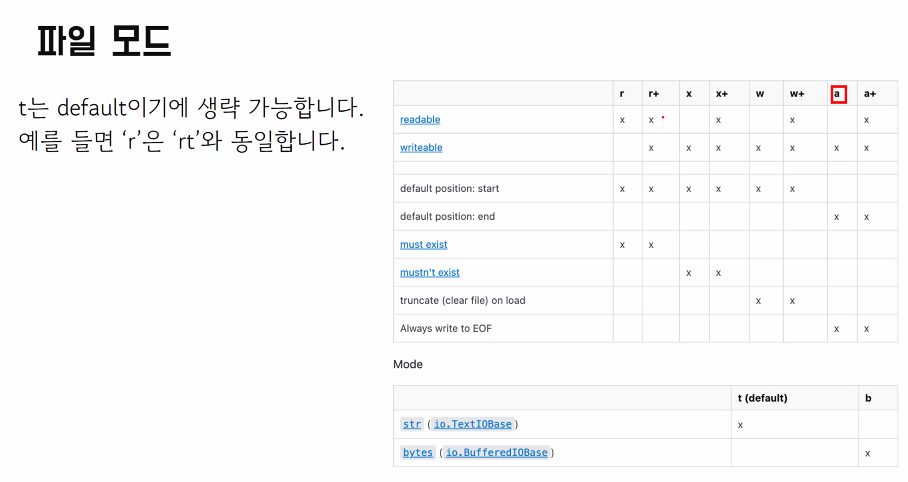

In [18]:
import os
path = "./datas/"
files = [path + file for file in os.listdir(path)]
files

['./datas/bola-tinubu-godfather-lagos-nigerias-president-elect-2023-03-01.html',
 './datas/czech-online-grocers-look-east-west-beyond-their-home-market-2023-03-01.html',
 './datas/hong-kongs-office-landlords-face-tough-rebound-2023-03-01.html',
 './datas/south-african-scientists-use-bugs-war-against-water-hyacinth-weed-2023-03-01.html',
 './datas/upbeat-new-zealand-back-same-squad-deliver-against-sri-lanka-2023-03-01.html']

In [19]:
with open(files[2],"r", encoding='utf-8') as f:
    html = f.read()

In [20]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html.parser')
title = soup.select_one("#main-content > article > div.article__main__33WV2 > div.article__content__6hMn9 > header > div > div > h1")
# 웹 페이지 창에서 f12 -> 원하는 요소 우클릭 copy -> copy selector
print(title.text)

Hong Kong’s office landlords face a tough rebound


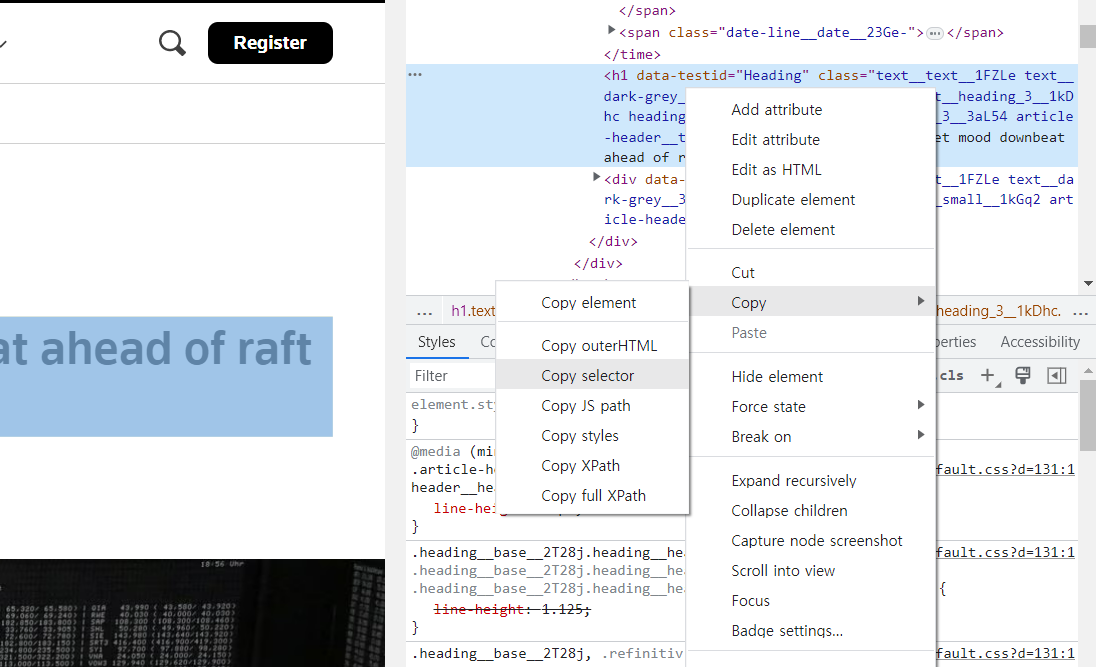

In [21]:
soup.h1

<h1 class="text__text__1FZLe text__dark-grey__3Ml43 text__medium__1kbOh text__heading_3__1kDhc heading__base__2T28j heading__heading_3__3aL54 article-header__title__3Y2hh" data-testid="Heading">Hong Kong’s office landlords face a tough rebound</h1>

In [22]:
soup.title.text

'Hong Kong’s office landlords face a tough rebound | Reuters'

In [30]:
print(soup.select_one('#main-content > article > div.article__main__33WV2 > div.article__content__6hMn9 > div > div > div.article-body__content__17Yit.paywall-article').text)

HONG KONG, March 1 (Reuters Breakingviews) - Hong Kong offices are emptier than in other Asian financial centres. While its borders are open and the city has dropped its mask mandate, a recovery looks tough. Commercial real estate space is growing, and there are fewer tenants.Overall prime office vacancies in the hub rose to over 12% in the three months to December, up from less than 10% last year, according to property consultancy JLL. Singapore and Tokyo boast rates well under half of Hong Kong’s level, and figures there are either improving or roughly unchanged. Premium office rents in the gateway to China have fallen nearly 30% since mid-2019.Most worrying is waning interest from the People’s Republic. Last year, mainland-based companies accounted for less than 6% of all leases in Hong Kong’s key Central business district, from nearly 30% in 2019. Ongoing weakness in the world’s second-largest economy means those tenants may be slow to return.Some developers have fared better than 

In [29]:
 [ i.text for i in soup.select("p")] # p태그의 값들을 리스트 형태로 가져옴

['HONG KONG, March 1 (Reuters Breakingviews) - Hong Kong offices are emptier than in other Asian financial centres. While its borders are open and the city has dropped its mask mandate, a recovery looks tough. Commercial real estate space is growing, and there are fewer tenants.',
 'Overall prime office vacancies in the hub rose to over 12% in the three months to December, up from less than 10% last year, according to property consultancy JLL. Singapore and Tokyo boast rates well under half of Hong Kong’s level, and figures there are either improving or roughly unchanged. Premium office rents in the gateway to China have fallen nearly 30% since mid-2019.',
 'Most worrying is waning interest from the People’s Republic. Last year, mainland-based companies accounted for less than 6% of all leases in Hong Kong’s key Central business district, from nearly 30% in 2019. Ongoing weakness in the world’s second-largest economy means those tenants may be slow to return.',
 'Some developers have f

In [25]:
# 표준(Standard) URL(=Canonical URL)
soup.find("link",{"rel":"canonical"})["href"]

'https://www.reuters.com/breakingviews/hong-kongs-office-landlords-face-tough-rebound-2023-03-01/'